In [34]:
import numpy as np
import matplotlib.pyplot as plt


# solving C-D equation as given below:
$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} - v\frac {\partial U}{\partial x}$$

$$ 0<x<1 \ \ \ 0<t \leq 1 $$

$$ IC: U(x, 0) = \exp(- \frac {(x+0.5)^2}{0.00125}) $$ 
$$ BC - Left: U(0, t) = \frac{0.025}{\sqrt{0.000625 + 0.02t}} \exp\left[ - \frac{(0.5-t)^2}{(0.00125 + 0.04t)} \right] $$
$$ BC - Right:  U(1, t) = \frac{0.025}{\sqrt{0.000625 + 0.02t}} \exp \left[- \frac{(1.5-t)^2}{(0.00125 + 0.04t)} \right] $$ 
$$  0<t \leq 1 $$

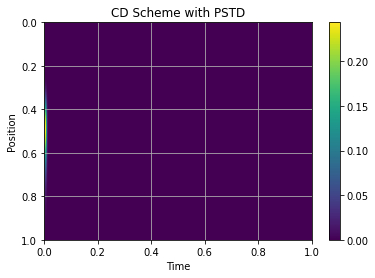

In [35]:
# Forward Time-stepping
# Parameters
L = 1.0
nx = 100;
nt = 1000;
T = 1;
v = 1.0
D = 0.1
dx = int(L/nx);
dt = int(T/nt);


# Defining grid 
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)


# Initial and Boundary Conditions
u0 = np.exp(-((x+0.5)**2)/(0.00125))
left = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(0.5 - t)**2)/(0.00125 + 0.04*t)))
right = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(1.5 - t)**2)/(0.00125 + 0.04*t)))

# Fourier wavenumbers
I = complex(0,1)
k = np.array([I*y for y in list(range(0,50)) + [0] + list(range(-50+1,0))])
k
# k = 2 * np.pi * np.fft.fftfreq(nx, d=L/nx)
k2=k**2;

u = u0;

# Defining variables
U_ps = np.zeros((nx, nt))

# Solving over time
for i in range(nt):
    u_hat = np.fft.fft(u)
    u_hat = u_hat + dt*D*u_hat*k2 - dt*v*k*1j*u_hat
    
    u_prime = np.real(np.fft.ifft(u_hat))
    u_prime[0] = left[i]
    u_prime[-1] = right[i]
    U_ps[:, i] = u_prime
    
    
fig = plt.figure()  
plt.imshow(np.transpose(U_ps), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
plt.colorbar()
plt.title("CD Scheme with PSTD")
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()
    

C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


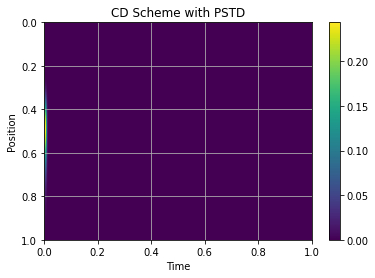

In [36]:
# RK4 time-stepping
# Forward Time-stepping
# Parameters
L = 1.0
nx = 100;
nt = 1000;
T = 1;
v = 1.0
D = 0.1
dx = int(L/nx);
dt = int(T/nt);


# Defining grid 
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)


# Initial and Boundary Conditions
u0 = np.exp(-((x+0.5)**2)/(0.00125))
left = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(0.5 - t)**2)/(0.00125 + 0.04*t)))
right = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(1.5 - t)**2)/(0.00125 + 0.04*t)))

# Fourier wavenumbers
I = complex(0,1)
k = np.array([I*y for y in list(range(0,50)) + [0] + list(range(-50+1,0))])
k
# k = 2 * np.pi * np.fft.fftfreq(nx, d=L/nx)
k2=k**2;

u = u0;

# Defining variables
U_ps = np.zeros((nx, nt))

# Solving over time
for i in range(nt):
    
    #u_hat = np.fft.fft(u)
    #u_hat = u_hat + dt*D*u_hat*k2 - dt*v*k*1j*u_hat
    
    
    k1 =  D * np.fft.ifft(-k**2 *dt * np.fft.fft(u)) - v * np.fft.ifft(1j *dt * k * np.fft.fft(u)) 
    k2 =  D * np.fft.ifft(-k**2 *dt * np.fft.fft(u + 0.5 * k1)) - v * np.fft.ifft(1j * k *dt * np.fft.fft(u + 0.5 * k1))
    k3 =  D * np.fft.ifft(-k**2 *dt * np.fft.fft(u + 0.5 * k2)) - v * np.fft.ifft(1j * k *dt * np.fft.fft(u + 0.5 * k2))
    k4 = D * np.fft.ifft(-k**2 *dt *  np.fft.fft(u + k3)) - v * np.fft.ifft(1j * k *dt *  np.fft.fft(u + k3))
    u_prime = u + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

    # u_prime = np.real(np.fft.ifft(u_hat))
    u_prime[0] = left[i]
    u_prime[-1] = right[i]
    U_ps[:, i] = u_prime
    
    
fig = plt.figure()  
plt.imshow(np.transpose(U_ps), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
plt.colorbar()
plt.title("CD Scheme with PSTD")
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()

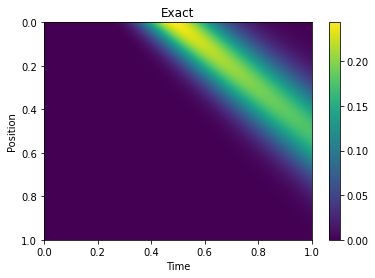

In [37]:
# Analytical Solution of above equation
# Analytical - du/dt = -v*du/dx+D*d2u/dx2 - c*u +d

Ci = 0; 
Co = 1;
# dCinf/dx = 0;
R = 1; 
c = 0.0
D = 0.01
v = 1.0
d = 0.0
nx = 101;
nt = 1001;

L = 1.0;
T = 1.0;

x = np.linspace(0, L, nx);
t = np.linspace(0, T, nt);


C = np.zeros((nt, nx))

for i in range(nt):  
    for j in range(nx):
        C[i, j] = (0.025/(np.sqrt(0.000625 + 0.02*t[i])))*np.exp((-(x[j] + 0.5 - t[i])**2)/(0.00125 + 0.04*t[i]))
        
        # An = np.exp(-c*t[i]/R)*(1-(erfc((R*x[j]-v*t[i])/(2*np.sqrt(D*R*t[i]))))*0.5 -  0.5*(np.exp(v*x[j]/(D)))*(erfc((R*x[j]+v*t[i])/(2*np.sqrt(D*R*t[i])))))       
        # un = v*(np.sqrt(1+ (4*c*D)/(v**2)))
        # Bn = 0.5*np.exp(((v-un)*x[j])/(2*D))*(erfc((R*x[j]-un*t[i])/(2*np.sqrt(D*R*t[i])))) + 0.5*np.exp(((v+un)*x[j])/(2*D))*(erfc((R*x[j] + un*t[i])/(2*np.sqrt(D*R*t[i]))))
        # print(np.shape(An), np.shape(Bn))
        # C[i, j] = d/c + (Ci - d/c)*An + (Co-d/c)*Bn

U_exact = np.transpose(C);

fig = plt.figure()  
plt.imshow(np.transpose(C), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
plt.colorbar()
plt.title("Exact")
plt.xlabel('Time')
plt.ylabel('Position')

#fig.set_size_inches(30.,18.)
# plt.savefig('U_CDI.png', dpi = 900)
plt.show()